Inspired by https://github.com/muyueh/Data_Exploration

# Alcohol Consumption (data: fivethirtyeight)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.library['fivethirtyeight']['axes.prop_cycle']

'#30a2da'
'#fc4f30'
'#e5ae38'
'#6d904f'
'#8b8b8b'


In [4]:
cons = pd.read_csv('./data/alcohol-consumption/drinks.csv')

http://pandas.pydata.org/pandas-docs/stable/basics.html

In [7]:
cons.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [10]:
cons.tail(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5
192,Zimbabwe,64,18,4,4.7


In [8]:
type(cons)

pandas.core.frame.DataFrame

In [9]:
cons.shape

(193, 5)

In [12]:
cons.index

RangeIndex(start=0, stop=193, step=1)

In [13]:
cons.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [14]:
cons.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## TODO: try idxmax, value_counts, mode, cut, qcut etc.

## Keep following... drinks can be complementary or substituting?

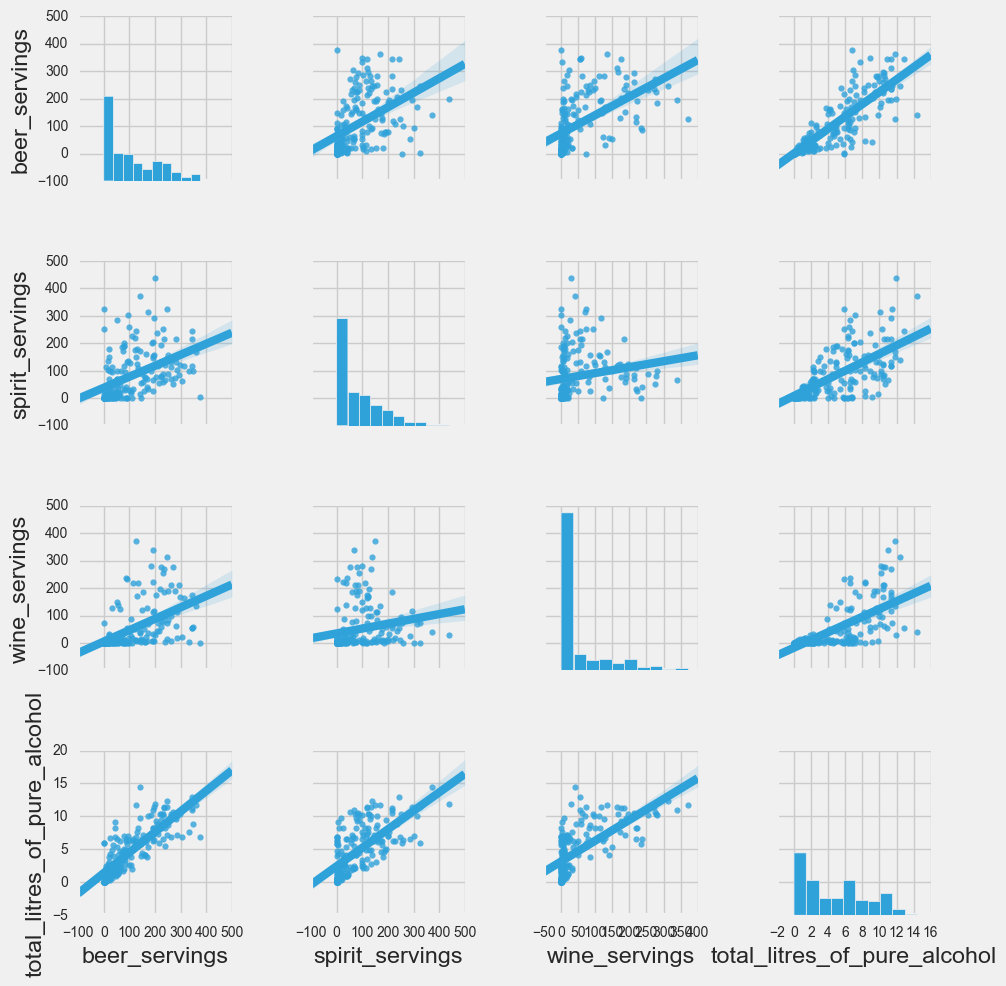

In [19]:
sns.pairplot(cons, kind="reg")

### Try with a subset and see what's going on...?

In [21]:
cons.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
    
* By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.
* The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.



### Remarks
* For the plots on diagonal line.. do not look at the y-axis, it is for the other plots... only x-axis (at the bottom) is relevant for these diagonal plots.

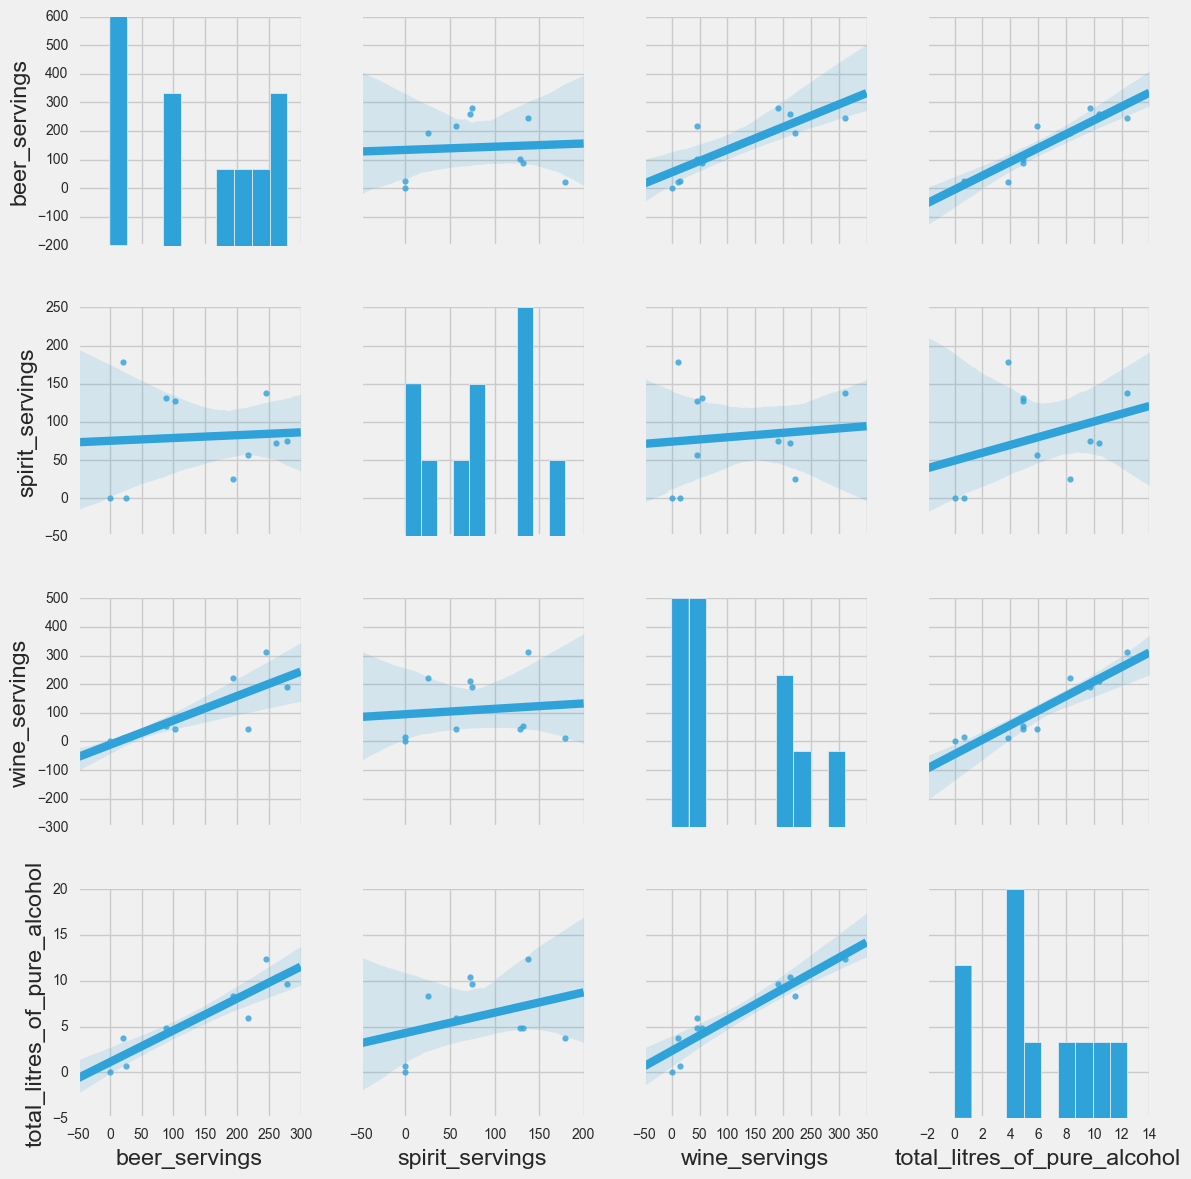

In [25]:
sns.pairplot(cons.head(10), kind="reg", size=3)

### WHY??? diag_kind="kde" will change the plots not on diagonal too???

* One point to note: the axis value range change.. maybe this is why the graph shape changed as well

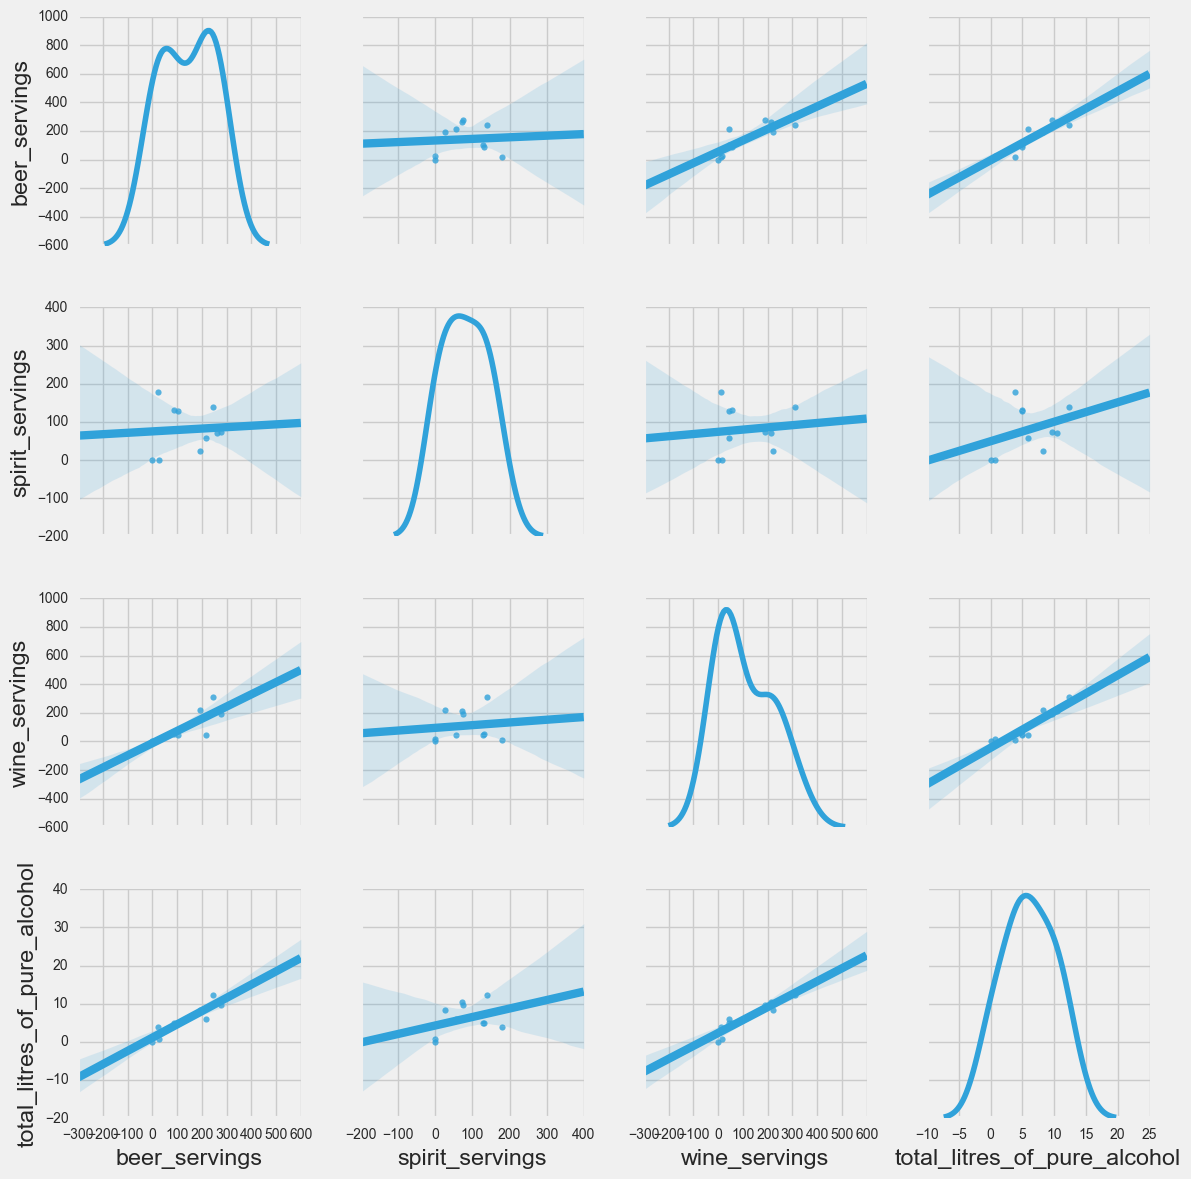

In [27]:
sns.pairplot(cons.head(10), kind="reg", size=3, diag_kind="kde")

### Try scatter plot

In [31]:
cons.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


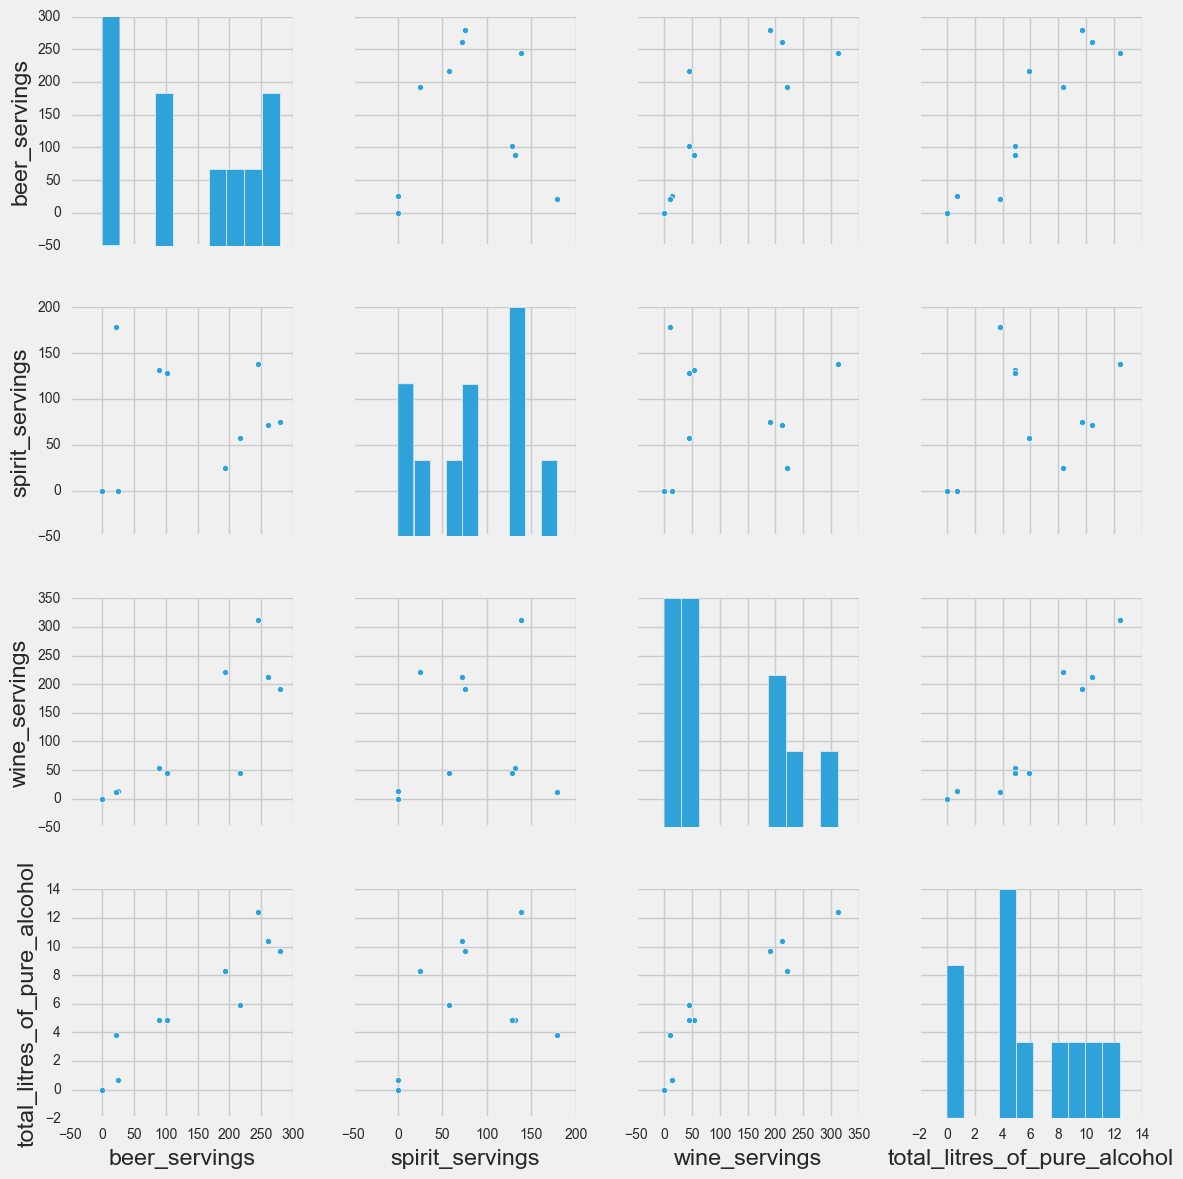

In [30]:
sns.pairplot(cons.head(10), kind="scatter", size=3)

## Skip the livescript and heatmap(?) part..

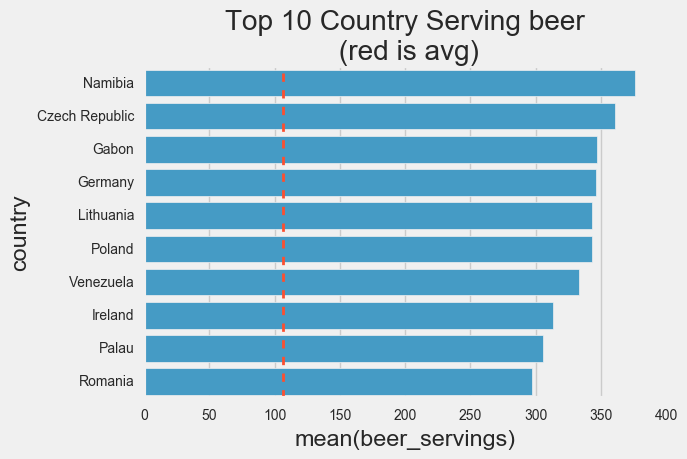

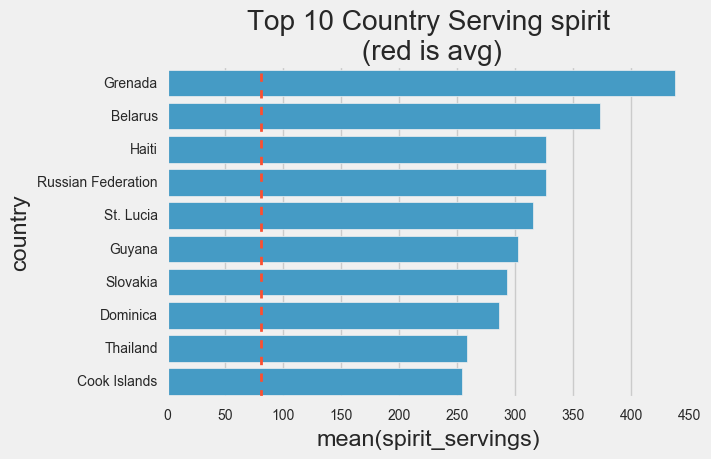

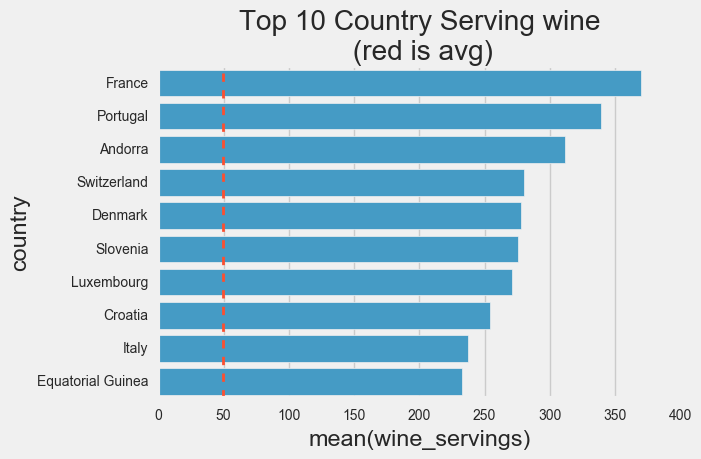

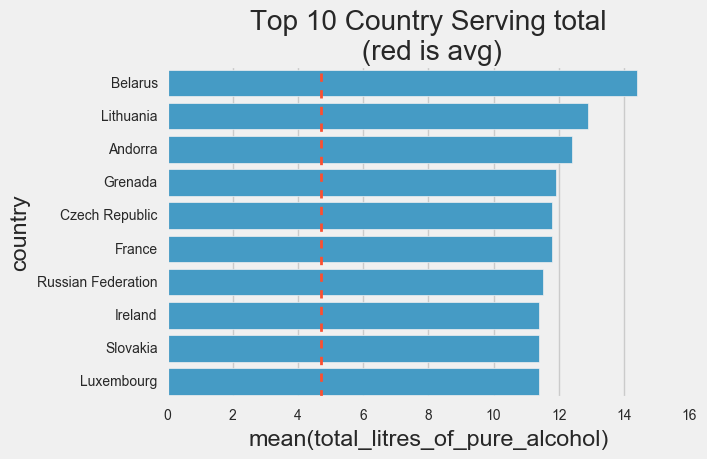

In [36]:
for col in cons.columns[1:]:
    drink = col
    sorted_cons = cons.sort_values(by=drink, ascending=False)
    g = sns.barplot(data=sorted_cons.head(n=10), orient='h', x=drink, y='country', color='#30a2da')
    plt.axvline(cons[drink].mean(), color='#fc4f30', linestyle='dashed', linewidth=2)
    g.set_title('Top 10 Country Serving ' + drink.split('_')[0] + '\n (red is avg)')
    plt.show()

### Try to convert the dataframe from wide to long and then plot this again

In [47]:
cons_melted = pd.melt(cons, id_vars=['country'], value_vars=['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol'])

In [48]:
cons_melted.head(10)

,country,variable,value
0,Afghanistan,beer_servings,0.0
1,Albania,beer_servings,89.0
2,Algeria,beer_servings,25.0
3,Andorra,beer_servings,245.0
4,Angola,beer_servings,217.0
5,Antigua & Barbuda,beer_servings,102.0
6,Argentina,beer_servings,193.0
7,Armenia,beer_servings,21.0
8,Australia,beer_servings,261.0
9,Austria,beer_servings,279.0


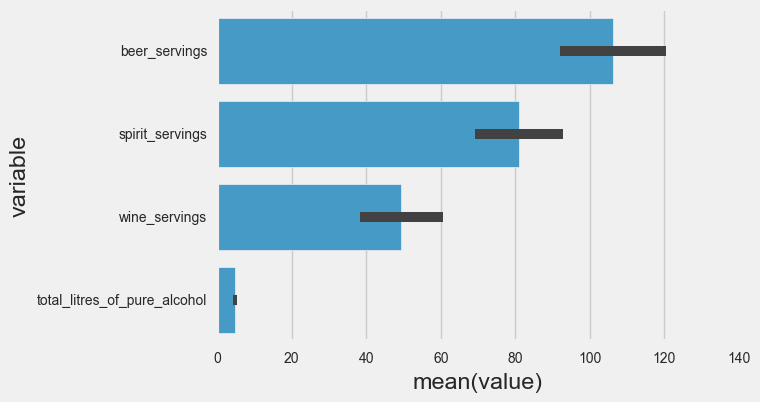

In [49]:
g = sns.barplot(data=cons_melted, orient='h', x='value', y='variable', color='#30a2da')
plt.show()

## Something new: jointplot

In [52]:
cons.columns[1:4]

Index(['beer_servings', 'spirit_servings', 'wine_servings'], dtype='object')

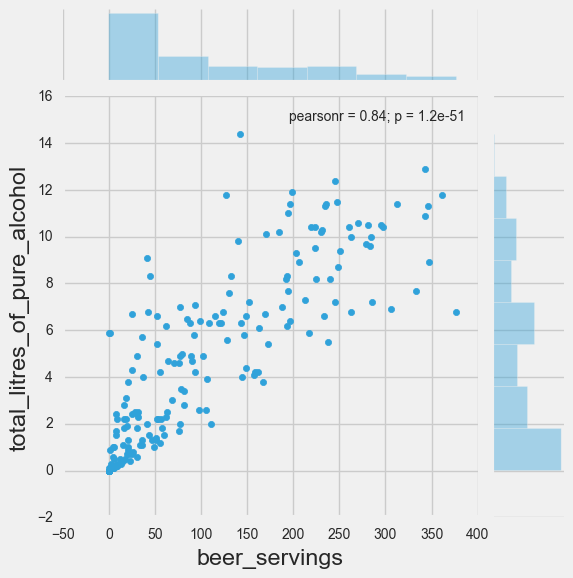

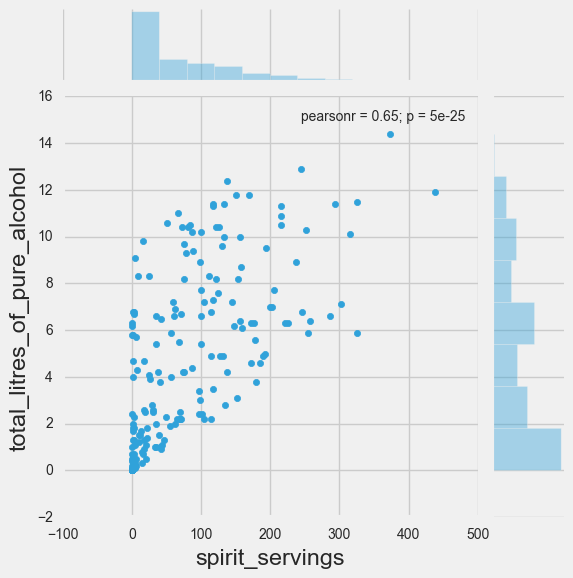

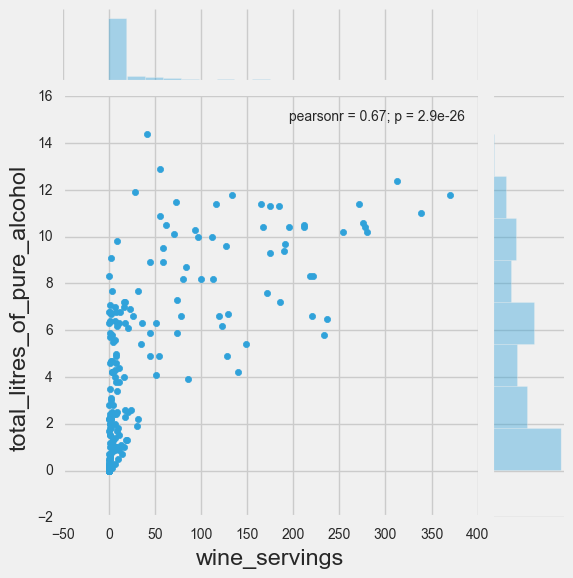

In [53]:
for col in cons.columns[1:4]:
    g = sns.jointplot(x=col, y="total_litres_of_pure_alcohol", data=cons)

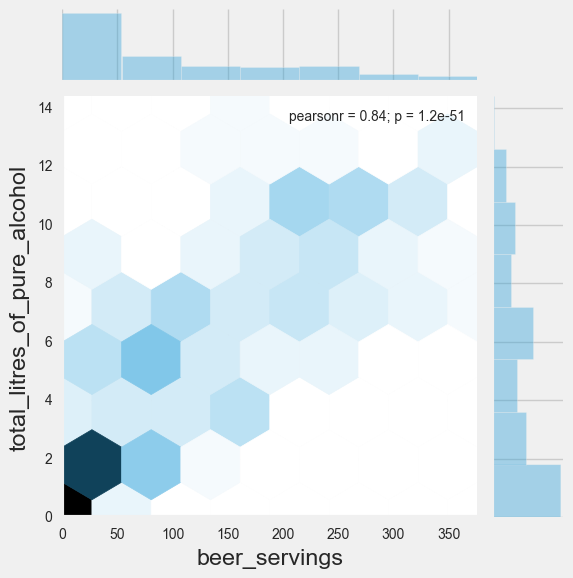

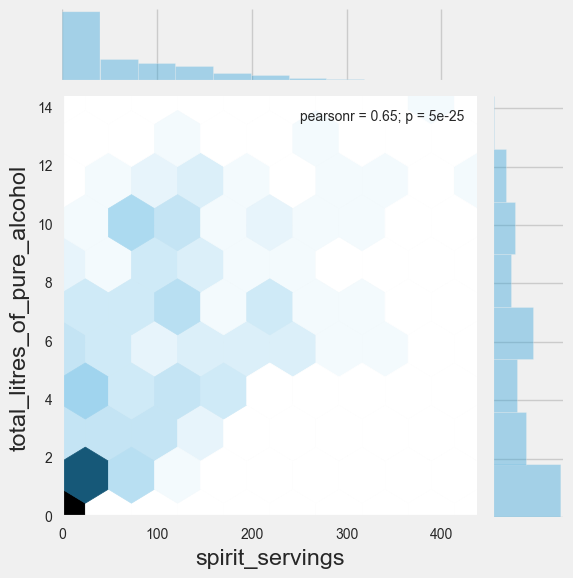

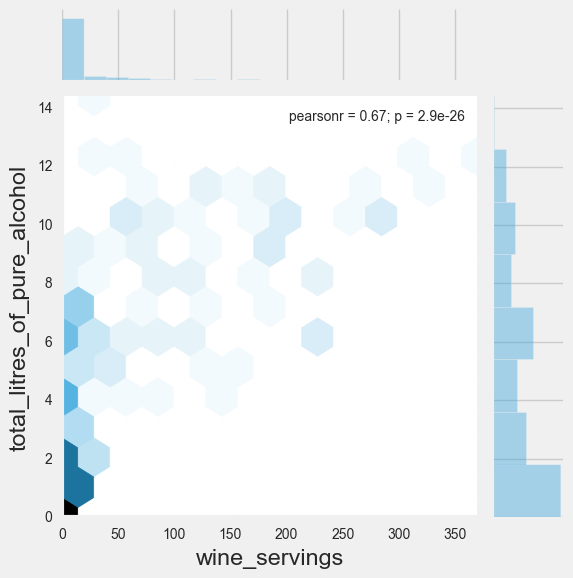

In [54]:
for col in cons.columns[1:4]:
    g = sns.jointplot(x=col, y="total_litres_of_pure_alcohol", data=cons, kind='hex')

Do not know what conclusion to draw. But at least we know beer consumption correlates better with total..